In [1]:
#Import tensorflow and check version
import tensorflow as tf

# Updated for TensorFlow 2
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.3.1


# Import MNIST Dataset

MNIST dataset has lots of images of hand-written digits along with their labels.

In [2]:
#Import train and testing sets
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [3]:
#Check the shape of the sets
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


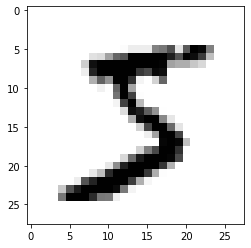

In [4]:
#Images are 28 x 28 pixels (784px)
#Check first image in training set x_train[0]
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [5]:
# x_train[0] seems like a 5, lets check what is the label in y_train[0]
y_train[0]

5

In [7]:
#Check unique labels
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Preprocessing labels with One Hot Encoding

Here we change the way this label is represented from a class name or number to a list of all possible classes with all the classes set to 0 except the one which this example belongs to - which will be set to 1. For example:


| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |


In [8]:
#Import encoder from utils under tf.keras and encode y_train and y_test
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [9]:
#Check the shape of the encoded labels.
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [10]:
#Check the first encoded label in training set, should be 5 encoded.
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Preprocessing the inputs

We will create a Neural Network which will take 784 dimensional vectors as inputs (28 rows * 28 columns) and will output a 10 dimensional vector (For the 10 classes). We have already converted the outputs to 10 dimensional, one-hot encoded vectors. Now, let's convert the input to the required format as well. We will use numpy to easily unroll the examples from `(28, 28)` arrays to `(784, 1)` vectors.

In [11]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Each element in each example is a pixel value. Let's take a look at a few values of just one example.

In [12]:
#Check first input in reshaped train set
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Pixel values, in this dataset, range from 0 to 255. While that's fine if we want to display our images, for our neural network to learn the weights and biases for different layers, computations will be simply much more effective and fast if we *normalized* these values. In order to normalize the data, we can calculate the mean and standard deviation for each example.

In [13]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


Now we will normalise both the training and test set using the mean and standard deviation we just calculated. Notice that we will need to apply the same mean and standard deviation to the test set even though we did not use the test set to calculate these values.

In [14]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

Note how we added a small value to our denominator. This is because, just in case if our std was close to zero, we'd get very large values as a result. In this case, that's obviously not true but we added this anyway as a good practice since this is typically done to ensure numerical stability.

We looked at some of the values for the first training example before. Let's take a look at it again, after having normalised the values.

In [15]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model

We use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. This means, like our examples above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Input layer with 784 nodes (784px), 2 hidden layers with 128 nodes, output layer with 10 nodes (classes 0 to 9)
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [17]:
#Compiler with stochastic gradient descent sgd optimizer to optimize the weights and biases. 
#To minimize the loss, we use the loss function categorical cross entropy.
#accuracy for metrics.
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

We are going to train the model for 5 epochs.

In [18]:
model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3706 - accuracy: 0.8925
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1780 - accuracy: 0.9482
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1354 - accuracy: 0.9602: 0s - loss: 0.1356 - accura
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1103 - accuracy: 0.9682
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0936 - accuracy: 0.9729


In [19]:
#Evaluate the model performance on the test set
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9686
test set accuracy:  96.85999751091003


# Run Predictions

In [20]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


We probably can't go through all the 10000 predictions for now, but we can take a look at the first few. Let's plot the first few test set images along with their predicted and actual labels and see how our trained model actually performed.

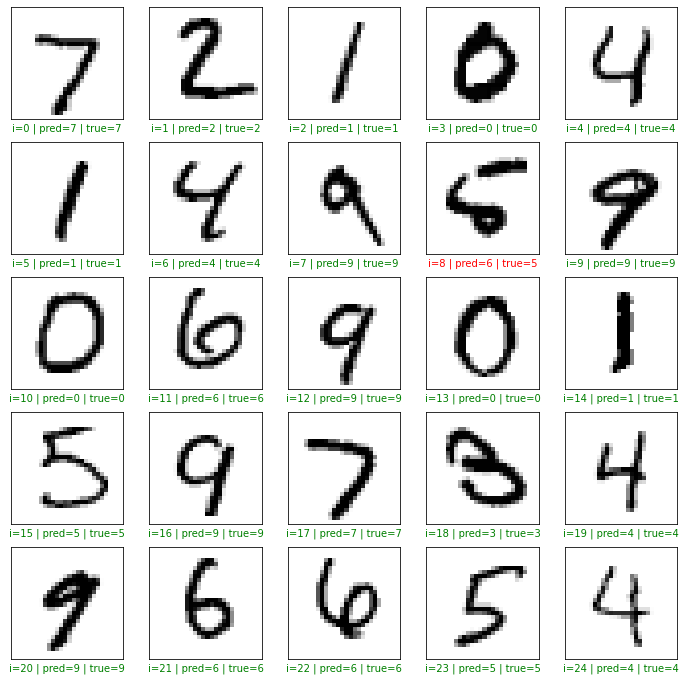

In [21]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

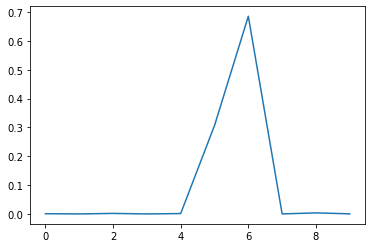

In [27]:
#Probability score
index = 8

plt.plot(preds[index])
plt.show()